In [5]:
import pandas as pd

C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
hr_df = pd.read_csv("./data/HR_comma_sep.csv")

In [7]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\DELL\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Insights
- Does Satisfaction level influence people leaving or not laning 
- Last evaluation 
- Time Spends COmpany

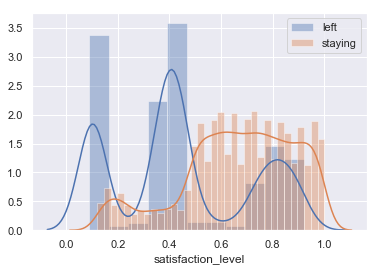

In [10]:
sns.distplot(hr_df[hr_df['left']==1]['satisfaction_level'],label = 'left')
sns.distplot(hr_df[hr_df['left']==0]['satisfaction_level'],label = 'staying')
plt.legend()

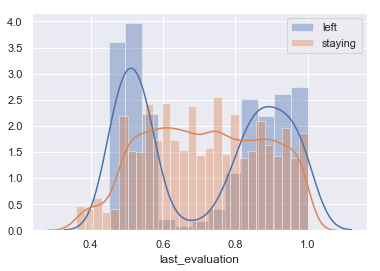

In [11]:
sns.distplot(hr_df[hr_df['left']==1]['last_evaluation'],label = 'left')
sns.distplot(hr_df[hr_df['left']==0]['last_evaluation'],label = 'staying')
plt.legend()

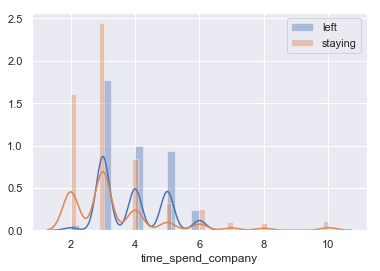

In [12]:
sns.distplot(hr_df[hr_df['left']==1]['time_spend_company'],label = 'left')
sns.distplot(hr_df[hr_df['left']==0]['time_spend_company'],label = 'staying')
plt.legend()

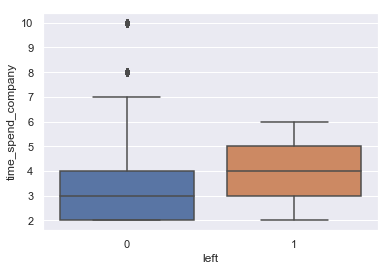

In [13]:
sns.boxplot(data = hr_df,x = 'left',y = 'time_spend_company')

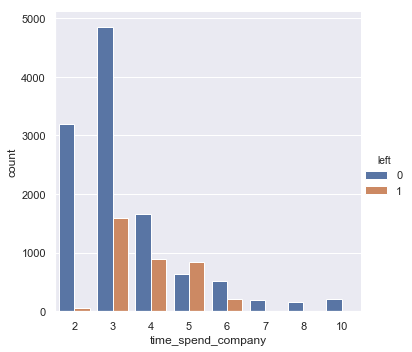

In [14]:
sns.catplot(data = hr_df, 
            x = 'time_spend_company',
           kind = 'count',
           hue = 'left')

# ENcoding Categorical features

In [15]:
hr_df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# Get DUmmies

In [16]:
hr_encoded_df = pd.get_dummies(hr_df,columns = ['sales','salary'],drop_first=True)

In [17]:
hr_encoded_df[0:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_features = list(hr_encoded_df.columns)

In [20]:
X_features.remove('left')

In [21]:
X_train,X_test,\
y_train,y_test = train_test_split(hr_encoded_df[X_features],
                                 hr_encoded_df.left,
                                 train_size = .8,
                                 random_state = 100)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
X_train.shape

(11999, 18)

In [23]:
X_test.shape

(3000, 18)

### Build a Logistic regression Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg_v1 = LogisticRegression()

In [26]:
logreg_v1.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predict On Test Set

In [27]:
Y_pred_v1 = logreg_v1.predict(X_test)

In [28]:
y_df_v1 = pd.DataFrame({"actual":y_test,
                       "predicted": Y_pred_v1})

In [29]:
y_df_v1[0:5]

,actual,predicted
10155,0,0
11688,0,0
12598,1,1
12192,1,0
8678,0,1


### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm_v1 = confusion_matrix(y_df_v1.actual,
                 y_df_v1.predicted,
                 [1,0])

Text(30.5, 0.5, 'Actual')

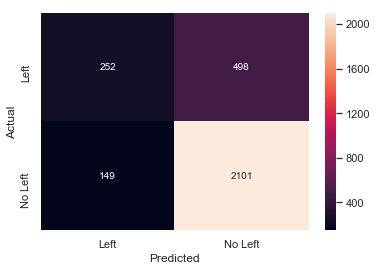

In [32]:
sns.heatmap(cm_v1,
            annot = True,
           fmt = '0.0f',
           xticklabels=['Left','No Left'],
           yticklabels=['Left','No Left']);
plt.xlabel('Predicted')
plt.ylabel('Actual')

### 
- precision = Tp/(TP+FP) from model pov
- recall = Tp/(tp+fn)
    - to minimise FN we use recall
    - to minimise fp we use precision
- f1 score = 2(prcision * recall)/(Pre + recall)


In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_df_v1.actual,
                           y_df_v1.predicted))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2250
           1       0.63      0.34      0.44       750

   micro avg       0.78      0.78      0.78      3000
   macro avg       0.72      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



### recall .34 means out of 100 model can predict only 34 people who are leaving
precision .63 means out of 100 people only 63 will leave, 37 wont

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
tree_v2 = DecisionTreeClassifier(max_depth = 5)

In [38]:
tree_v2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
y_pred_tree = tree_v2.predict(X_test)

In [43]:
cm_tree = confusion_matrix(y_test,y_pred_tree,[1,0])

Text(30.5, 0.5, 'Actual')

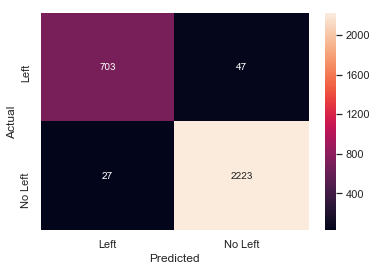

In [44]:
sns.heatmap(cm_tree,
            annot = True,
           fmt = '0.0f',
           xticklabels=['Left','No Left'],
           yticklabels=['Left','No Left']);
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [48]:
y_df_tree = pd.DataFrame({"actual":y_test,
                       "predicted": y_pred_tree})

In [50]:
print(classification_report)

<function classification_report at 0x000002812DA18D90>


In [53]:
print(classification_report(y_df_tree.actual,y_df_tree.predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2250
           1       0.96      0.94      0.95       750

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



### Visuvalising the tree

In [54]:
from sklearn.tree import export_graphviz

In [55]:
export_graphviz(tree_v2,out_file = 'tree.dot',
               feature_names = X_features,
               class_names = ['No Left','Left'],
               filled = True)

In [56]:
import pydotplus as pdot

In [58]:
pdot.graph_from_dot_file("tree.dot")

In [59]:
tree_graph.write_jpeg("tree.jpeg")

NameError: name 'tree_graph' is not defined